# Simple Linear Regression

## Steps 

- Reading the Dataset.
- EDA, Feature Enginering
- Divide our Dataset into Independent and dependent Features
- Further Divide the dataset to train and test
- Use Standard Scaler (Scaling technique) on train and test data


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np 
import seaborn  as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [7]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

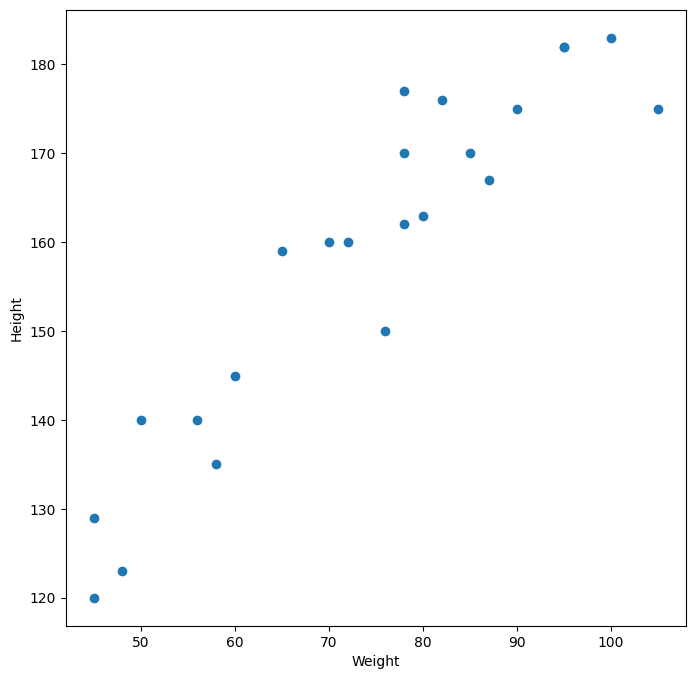

In [8]:
plt.figure(figsize=(8,8))

plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [9]:
## Divide our Dataset into Independent and dependent Features


X = df[['Weight']] ## beacuse it require 2D array data

y = df['Height']

In [10]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [11]:
X.shape

(23, 1)

In [12]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [13]:
y.shape

(23,)

In [14]:
## Divide the dataset into train test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state= 42)

In [15]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [16]:
X_train.shape

(18, 1)

In [17]:
X_test.head()

,Weight
15,78
9,78
0,45
8,95
17,65


In [18]:
X_test.shape

(5, 1)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [20]:
scaler

StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train) ## use fit_transform for X_train data beacuse it calculate standard deviation and mean from train data 

In [22]:
X_test = scaler.transform(X_test) ## use only transform for X_test data 

In [23]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [24]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

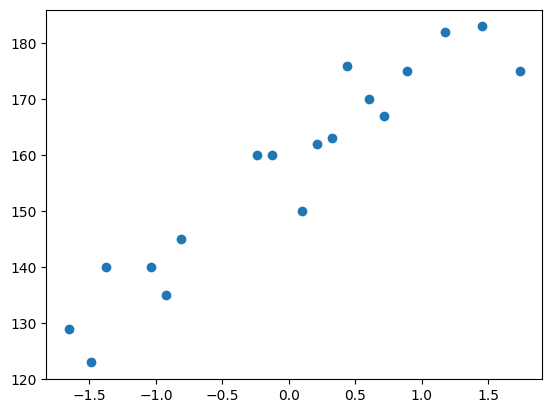

In [25]:
plt.scatter(X_train,y_train)

In [26]:
## Mean of X_train
X_train.mean()

3.6390643584935686e-16

In [27]:
## Standard Deviation 
X_train.std()

1.0

In [28]:
## New Data point
scaler.transform([[80]])

array([[0.32350772]])

In [29]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [30]:
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
## b or B0 Intercept value 
regression.intercept_

157.5

In [32]:
## Slope value
regression.coef_

array([17.03440872])

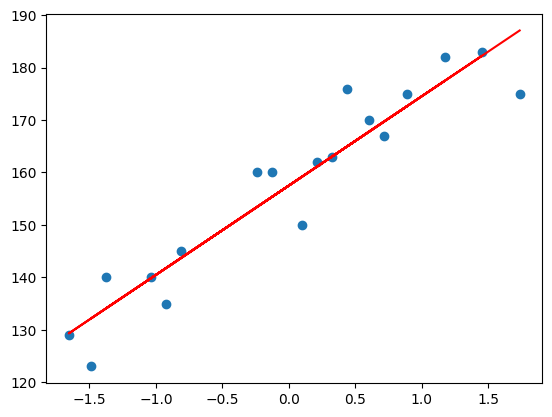

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [34]:
## Prediction for test Data 

Y_pred = regression.predict(X_test)

In [35]:
# Predicted Value 
Y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [36]:
# Actual Value
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# Perfomance metrics

In [37]:
## MAE | MSE | RMSE
from sklearn.metrics import mean_absolute_error,mean_squared_error 

In [38]:
mse = mean_squared_error(y_test,Y_pred)
mae = mean_absolute_error(y_test,Y_pred)
rmse = np.sqrt(mse)

In [39]:
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Perfomance Metrics

## Accuracy of the model R squared and Adjusted r ssquared
## R square
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score = r2_score(y_test,Y_pred)

In [42]:
r2_score

0.776986986042344

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [43]:
1 - (1-r2_score) * (len(y_test)-1) / (len(y_test)-X_test.shape[1] - 1)

0.7026493147231252